In [2]:
import matplotlib.pyplot as plt
from pgm import create_node
from pgm import create_node_from_pgm

ModuleNotFoundError: No module named 'tensornetwork'

In [3]:
!pip3 install tensornetwork

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/364.3 kB 100.2 MB/s eta 0:00:01
ERROR: Exception:
Traceback (most recent call last):
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 435, in _error_catcher
    yield
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/http/client.py", line 465, in read
    s = self.fp.read(amt)
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/home/huawei/anaconda3/envs/ml_env/lib/python3.10/ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File

In [4]:
logging.basicConfig(level=logging.DEBUG, filename='loggings/Experiment1' + '.log', filemode='a', format="%(levelname)s - %(message)s")

pgmf_path = "/content/drive/MyDrive/gray8bit/"
file_list = ['nightshot_iso_100.pgm', 
             'leaves_iso_1600.pgm', 
             'leaves_iso_200.pgm', 
             zone_plate.pgm']

mkdir: cannot create directory ‘loggings’: File exists


In [ ]:
%load_ext autoreload
%autoreload 2

In [12]:
def create_node(matrix, tensor_base):
  
  if len(matrix.shape) > 2:
    logger.error(f"create_node error: len(matrix.shape) ({len(matrix.shape)}) is more than {2}")
    return None, None
  
  pix_am = matrix.shape[0] * matrix.shape[1]
  N = math.log(pix_am, tensor_base)
  if not N.is_integer():
    logger.error(f"create_node error: the tensor rank {N} is not an integer")
    return None, None

  return tn.Node(np.reshape(matrix, tuple([tensor_base] * int(N)))), int(N) 

def create_node_from_pgm(im_pgm, tensor_base, width=512, height=512):
  
  if im_pgm.shape[1] != width or im_pgm.shape[0] != height: 
    resizer = A.Resize(width=width, height=height)
    im_pgm = resizer(image=im_pgm)["image"]
  
  return create_node(im_pgm, tensor_base)

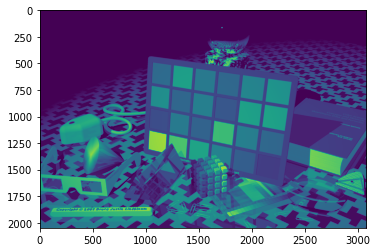

im_node.shape = (4, 4, 4, 4, 4, 4, 4, 4, 4)


In [15]:
file_name = next(enumerate(file_list))[1]
with open(pgmf_path + file_name, 'rb') as pgmf:
  im = plt.imread(pgmf)
  plt.imshow(im)
  plt.show()
  im_node, _ = create_node_from_pgm(im, 4)
  print(f"im_node.shape = {im_node.shape}")